### Just reference (Not Final)

In [46]:
# import numpy as np
# import matplotlib.pyplot as plt
# from filterpy.kalman import KalmanFilter

# # Read the ASCII file
# file_path = "/Users/ravitejakunchanapalli/Downloads/org_BESTPOS.ASCII"
# with open(file_path, 'r') as file:
#     data = file.readlines()
         
# # Initialize lists to store parsed data
# latitudes = []
# longitudes = []

# # Iterate through each line in the file
# for line in data:
#     # Split the line into log header and fields
#     log_header, fields = line.split(';')
    
#     # Split the fields into individual data points
#     fields = fields.split(',')
    
#     # Extract latitude, longitude, and their standard deviations
#     latitudes.append(float(fields[2]))
#     longitudes.append(float(fields[3]))

# # Define system matrices and initial conditions
# A = np.eye(2)  # Identity matrix, assuming a simple motion model
# B = np.zeros((2, 2))  # No control input
# H = np.eye(2)  # Identity matrix as we directly observe position
# Q = np.eye(2) * 0.01  # Process noise covariance
# R = np.eye(2) * 0.001  # Measurement noise covariance
# initial_state = np.array([latitudes[0], longitudes[0]])  # Initial position
# initial_covariance = np.eye(2)  # Initial covariance matrix

# # Create Kalman filter object
# kf = KalmanFilter(dim_x=2, dim_z=2)
# kf.x = initial_state
# kf.P = initial_covariance
# kf.F = A
# kf.H = H
# kf.Q = Q
# kf.R = R

# # Lists to store original and estimated data
# original_latitudes = []
# original_longitudes = []
# estimated_latitudes = []
# estimated_longitudes = []

# # Perform filtering for each measurement
# for latitude, longitude in zip(latitudes, longitudes):
#     measurement = np.array([[latitude], [longitude]])
#     kf.predict()
#     kf.update(measurement)
    
#     # Append original and estimated data
#     original_latitudes.append(latitude)
#     original_longitudes.append(longitude)
#     estimated_latitudes.append(kf.x[0])
#     estimated_longitudes.append(kf.x[1])

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(original_longitudes,original_latitudes,  'b', label='Original Data', color='blue')
# plt.plot(estimated_longitudes,estimated_latitudes,  'r', label='Estimated Data', color='red')
# plt.ylabel('Latitude')
# plt.xlabel('Longitude')
# plt.title('Original vs. Estimated Data')
# plt.legend()
# plt.grid(True)
# plt.show()


## Distance and error Calculation

In [47]:
import numpy as np

def lat_lon_to_meters(lat, lon):
    # Approximate conversion factors for latitude and longitude (for small differences)
    lat_to_m = 111320  # Approximately 111 km per degree latitude
    lon_to_m = 111320  # Approximately 111 km per degree longitude at the equator
    
    # Convert latitude and longitude to meters
    lat_meters = np.array(lat) * lat_to_m
    lon_meters = np.array(lon) * lon_to_m * np.cos(np.radians(lat))
    
    return lat_meters, lon_meters

def calculate_error(original, estimated):
    return np.array(original) - np.array(estimated)

## Reading the  data from the file

In [48]:
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
from scipy.linalg import block_diag
from filterpy.kalman import UnscentedKalmanFilter as UKF
from filterpy.kalman import MerweScaledSigmaPoints
from filterpy.kalman import ExtendedKalmanFilter
# Read the ASCII file
file_path = "/Users/ravitejakunchanapalli/Downloads/org_BESTPOS.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()

# Initialize lists to store parsed data
latitudes = []
longitudes = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extract latitude, longitude, and their standard deviations
    lat = float(fields[2])
    lon = float(fields[3])
    latitudes.append(lat)
    longitudes.append(lon)

## Kalman Filter code

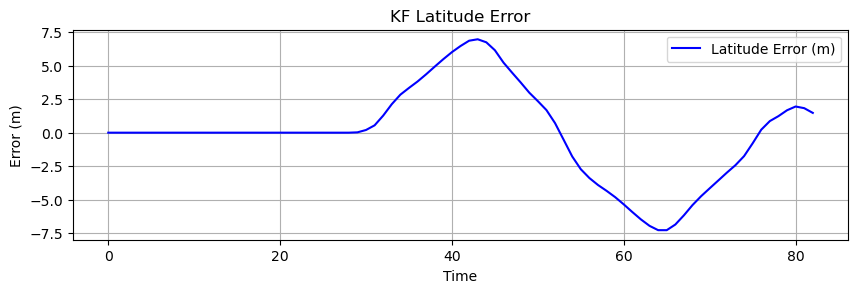

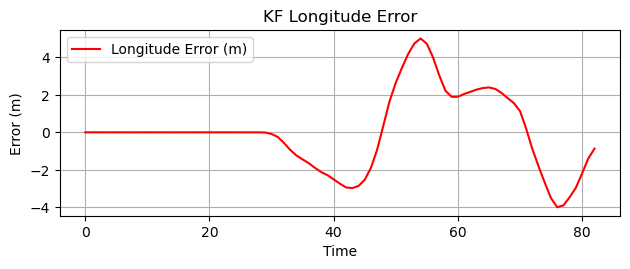

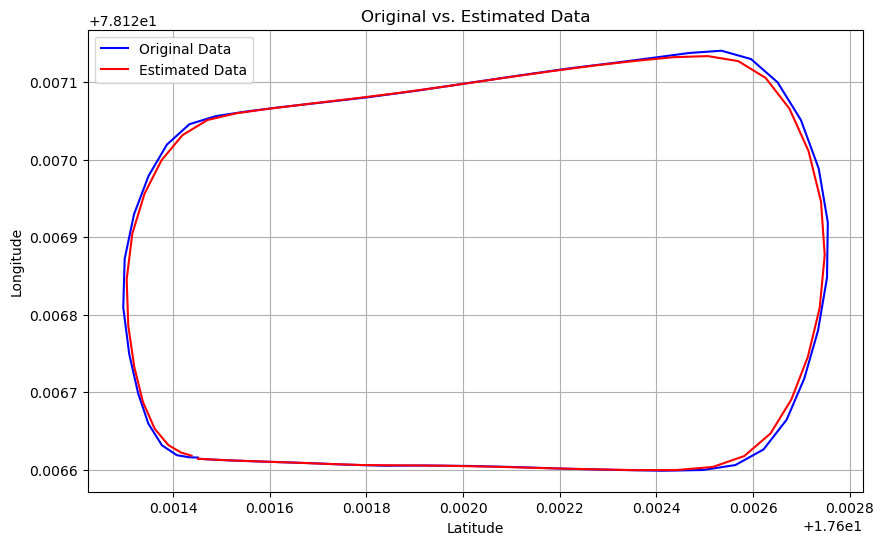

In [49]:

# Initialize the Kalman filter
kf = KalmanFilter(dim_x=2, dim_z=2)

# Define the state transition matrix
kf.F = np.array([[1., 0.],
                 [0., 1.]])

# Define the measurement matrix
kf.H = np.array([[1., 0.],
                 [0., 1.]])

# Initialize the state covariance matrix
kf.P = np.diag([1, 1])

# Initialize the measurement covariance matrix
kf.R = np.diag([0.01, 0.01])

# Initialize the process noise covariance matrix
kf.Q = np.diag([0.01, 0.01])

# Initialize the state vector
kf.x = np.array([[latitudes[0]], [longitudes[0]]])

# Apply the Kalman filter to the latitude and longitude data
filtered_states = []
for measurement in zip(latitudes, longitudes):
    kf.predict()
    kf.update(np.array(measurement))
    filtered_states.append(kf.x)

# Extract filtered latitudes and longitudes
filtered_latitudes_kf = [state[0, 0] for state in filtered_states]
filtered_longitudes_kf = [state[1, 0] for state in filtered_states]

# Assuming you have defined filtered_latitudes_kf and filtered_longitudes_kf
# Convert original and estimated coordinates to meters
original_latitudes_meters_kf, original_longitudes_meters_kf = lat_lon_to_meters(latitudes, longitudes)
estimated_latitudes_meters_kf, estimated_longitudes_meters_kf = lat_lon_to_meters(filtered_latitudes_kf, filtered_longitudes_kf)

# Calculate error in meters
lat_error_kf = calculate_error(original_latitudes_meters_kf,estimated_latitudes_meters_kf)
lon_error_kf = calculate_error(original_longitudes_meters_kf,estimated_longitudes_meters_kf)

# Plot Kalman filter error
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(lat_error_kf, label='Latitude Error (m)', color='blue')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('KF Latitude Error')
plt.legend()
plt.grid(True)
plt.show()

plt.subplot(2, 1, 2)
plt.plot(lon_error_kf, label='Longitude Error (m)', color='red')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('KF Longitude Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot the original and estimated data
plt.figure(figsize=(10, 6))
plt.plot(latitudes, longitudes,  label='Original Data', color='blue')
plt.plot(filtered_latitudes_kf, filtered_longitudes_kf, label='Estimated Data', color='red')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Original vs. Estimated Data')
plt.legend()
plt.grid(True)
plt.show()


## Extended kalman filter

In [50]:
# # Define the state transition function
# def f(x, dt):
#     # Assuming a constant velocity model
#     return x

# # Define the measurement function
# def h(x):
#     return x

# # Define the Jacobian of the state transition function
# def F(x, dt):
#     return np.eye(len(x))

# # Define the Jacobian of the measurement function
# def H(x):
#     return np.eye(len(x))

# # Initialize the state vector
# x = np.array([latitudes[0], longitudes[0]])

# # Initialize the state covariance matrix
# P = np.diag([1000.0, 1000.0])

# # Initialize the measurement covariance matrix
# R = np.diag([0.01, 0.01])

# # Initialize the process noise covariance matrix
# Q = np.diag([0.01, 0.01])

# # Initialize the time step
# dt = 1.0

# # Apply the Extended Kalman Filter to the latitude and longitude data
# filtered_states = []
# for measurement in zip(latitudes, longitudes):
#     # Prediction Step
#     x = f(x, dt)
#     Fx = F(x, dt)
#     P = Fx @ P @ Fx.T + Q
    
#     # Update Step
#     y = np.array(measurement) - h(x)
#     Hx = H(x)
#     S = Hx @ P @ Hx.T + R
#     K = P @ Hx.T @ np.linalg.inv(S)
#     x = x + K @ y
#     P = (np.eye(len(x)) - K @ Hx) @ P
    
#     filtered_states.append(x)

# # Extract filtered latitudes and longitudes
# filtered_latitudes_ekf = [state[0] for state in filtered_states]
# filtered_longitudes_ekf= [state[1] for state in filtered_states]



# # Assuming you have defined filtered_latitudes_ekf and filtered_longitudes_ekf
# # Convert original and estimated coordinates to meters
# original_latitudes_meters_ekf, original_longitudes_meters_ekf = lat_lon_to_meters(latitudes, longitudes)
# estimated_latitudes_meters_ekf, estimated_longitudes_meters_ekf = lat_lon_to_meters(filtered_latitudes_ekf, filtered_longitudes_ekf)

# # Calculate error in meters
# lat_error_ekf = calculate_error(original_latitudes_meters_ekf, estimated_latitudes_meters_ekf)
# lon_error_ekf = calculate_error(original_longitudes_meters_ekf, estimated_longitudes_meters_ekf)

# # Plot EKF error
# plt.figure(figsize=(10, 6))
# plt.subplot(2, 1, 1)
# plt.plot(lat_error_ekf, label='Latitude Error (m)', color='blue')
# plt.xlabel('Time')
# plt.ylabel('Error (m)')
# plt.title('EKF Latitude Error')
# plt.legend()
# plt.grid(True)
# plt.show()

# plt.subplot(2, 1, 2)
# plt.plot(lon_error_ekf, label='Longitude Error (m)', color='red')
# plt.xlabel('Time')
# plt.ylabel('Error (m)')
# plt.title('EKF Longitude Error')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


# # Plot the original and estimated data
# plt.figure(figsize=(10, 6))
# plt.plot(latitudes, longitudes,  label='Original Data', color='blue')
# plt.plot(filtered_latitudes_ekf, filtered_longitudes_ekf, label='Estimated Data', color='red')
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
# plt.title('Original vs. Estimated Data')
# plt.legend()
# plt.grid(True)
# plt.show()


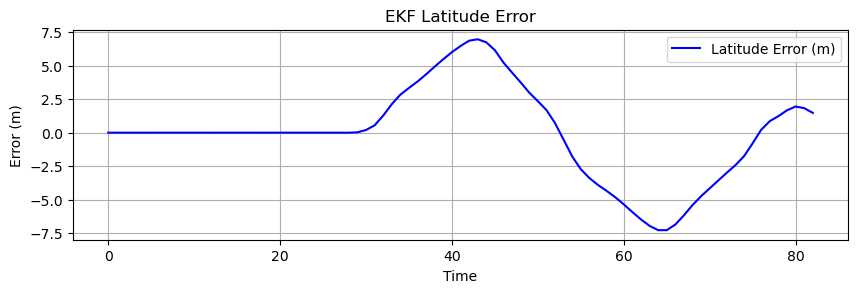

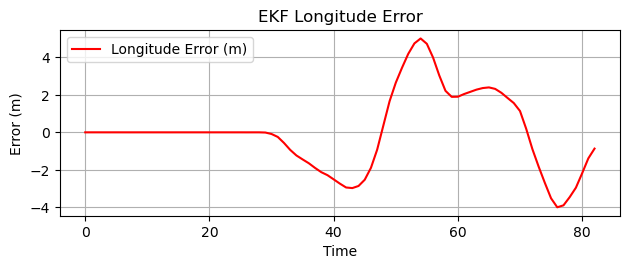

/var/folders/lk/qt3zp1vs2b15lty189sx1bq00000gn/T/ipykernel_7700/2269816437.py:83: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(latitudes, longitudes, 'b', label='Original Data', color='blue')
/var/folders/lk/qt3zp1vs2b15lty189sx1bq00000gn/T/ipykernel_7700/2269816437.py:84: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(filtered_latitudes_ekf, filtered_longitudes_ekf, 'r', label='Estimated Data', color='red')


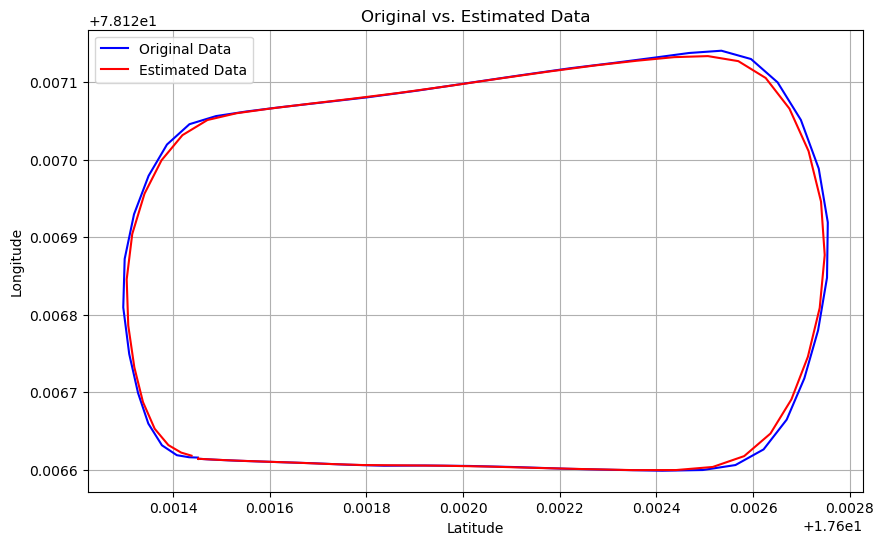

In [51]:
# Define the state transition function
def f(x, dt):
    # Assuming a constant velocity model
    return x

# Define the measurement function
def h(x):
    return x

# Define the Jacobian of the measurement function
def HJacobian(x):
    return np.eye(2)  # Identity matrix since measurement function is identity

# Initialize the Extended Kalman Filter
kf = ExtendedKalmanFilter(dim_x=2, dim_z=2)

# Set the state transition function and measurement function for the filter
kf.x = np.array([latitudes[0], longitudes[0]])
kf.F = np.eye(2)  # State transition matrix
kf.H = np.eye(2)  # Measurement matrix

# Initialize the state covariance matrix
kf.P *= 1000.0

# Initialize the measurement covariance matrix
kf.R = np.diag([0.01, 0.01])

# Initialize the process noise covariance matrix
kf.Q = np.diag([0.01, 0.01])

# Initialize the time step
dt = 1.0

# Apply the Extended Kalman Filter to the latitude and longitude data
filtered_states = []
for measurement in zip(latitudes, longitudes):
    kf.predict()
    
    # Update Step
    kf.update(np.array(measurement), HJacobian=HJacobian, Hx=h)  
    
    filtered_states.append(kf.x)

# Extract filtered latitudes and longitudes
filtered_latitudes_ekf= [state[0] for state in filtered_states]
filtered_longitudes_ekf= [state[1] for state in filtered_states]



# Convert original and estimated coordinates to meters
original_latitudes_meters_ekf, original_longitudes_meters_ekf = lat_lon_to_meters(latitudes, longitudes)
estimated_latitudes_meters_ekf, estimated_longitudes_meters_ekf = lat_lon_to_meters(filtered_latitudes_ekf, filtered_longitudes_ekf)

# Calculate error in meters
lat_error_ekf = calculate_error(original_latitudes_meters_ekf, estimated_latitudes_meters_ekf)
lon_error_ekf = calculate_error(original_longitudes_meters_ekf, estimated_longitudes_meters_ekf)

# Plot EKF error
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(lat_error_ekf, label='Latitude Error (m)', color='blue')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('EKF Latitude Error')
plt.legend()
plt.grid(True)
plt.show()

plt.subplot(2, 1, 2)
plt.plot(lon_error_ekf, label='Longitude Error (m)', color='red')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('EKF Longitude Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# Plot the original and estimated data
plt.figure(figsize=(10, 6))
plt.plot(latitudes, longitudes, 'b', label='Original Data', color='blue')
plt.plot(filtered_latitudes_ekf, filtered_longitudes_ekf, 'r', label='Estimated Data', color='red')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Original vs. Estimated Data')
plt.legend()
plt.grid(True)
plt.show()

## UKF

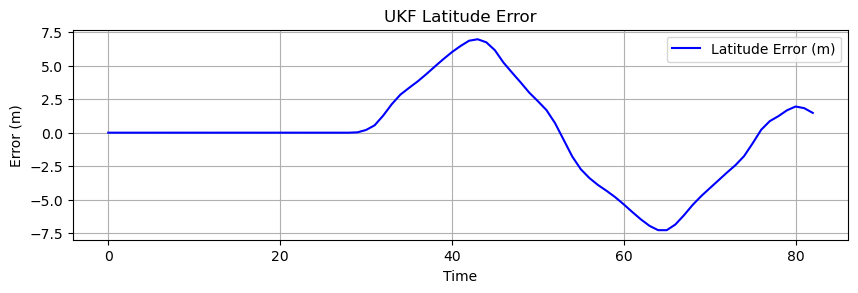

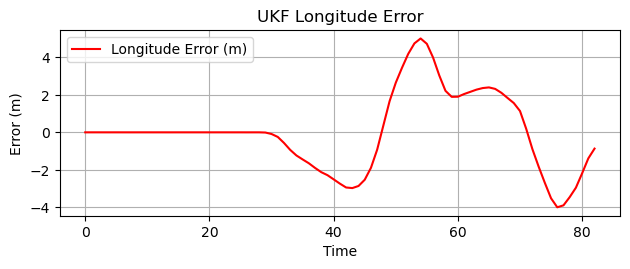

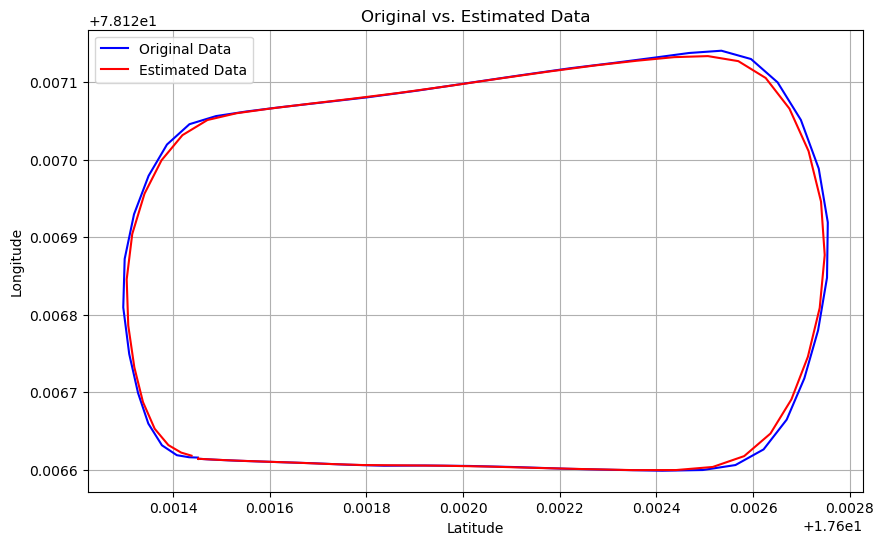

In [52]:
# Define the state transition function
def f(x, dt):
    # Assuming a constant velocity model
    return x

# Define the measurement function
def h(x):
    return x

# Initialize the state vector
x = np.array([latitudes[0], longitudes[0]])

# Initialize the state covariance matrix
P = np.diag([1000.0, 1000.0])

# Initialize the measurement covariance matrix
R = np.diag([0.01, 0.01])

# Initialize the process noise covariance matrix
Q = np.diag([0.01, 0.01])

# Initialize the time step
dt = 1.0

# Define sigma points
points = MerweScaledSigmaPoints(n=2, alpha=0.1, beta=2., kappa=1.)

# Initialize the UKF
ukf = UKF(dim_x=2, dim_z=2, dt=dt, fx=f, hx=h, points=points)

# Set initial state and covariance
ukf.x = x
ukf.P = P

# Set process and measurement noise
ukf.R = R
ukf.Q = Q

# Apply the Unscented Kalman Filter to the latitude and longitude data
filtered_states = []
for measurement in zip(latitudes, longitudes):
    ukf.predict()
    ukf.update(measurement)
    filtered_states.append(ukf.x)

# Extract filtered latitudes and longitudes
filtered_latitudes_ukf= [state[0] for state in filtered_states]
filtered_longitudes_ukf= [state[1] for state in filtered_states]

# Convert original and estimated coordinates to meters
original_latitudes_meters_ukf, original_longitudes_meters_ukf = lat_lon_to_meters(latitudes, longitudes)
estimated_latitudes_meters_ukf, estimated_longitudes_meters_ukf = lat_lon_to_meters(filtered_latitudes_ukf, filtered_longitudes_ukf)

# Calculate error in meters
lat_error_ukf = calculate_error(original_latitudes_meters_ukf, estimated_latitudes_meters_ukf)
lon_error_ukf = calculate_error(original_longitudes_meters_ukf, estimated_longitudes_meters_ukf)

# Plot UKF error
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(lat_error_ukf, label='Latitude Error (m)', color='blue')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('UKF Latitude Error')
plt.legend()
plt.grid(True)
plt.show()

plt.subplot(2, 1, 2)
plt.plot(lon_error_ukf, label='Longitude Error (m)', color='red')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('UKF Longitude Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the original and estimated data
plt.figure(figsize=(10, 6))
plt.plot(latitudes, longitudes, label='Original Data', color='blue')
plt.plot(filtered_latitudes_ukf, filtered_longitudes_ukf, label='Estimated Data', color='red')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Original vs. Estimated Data')
plt.legend()
plt.grid(True)
plt.show()


## MAf(Moving Average Filter )

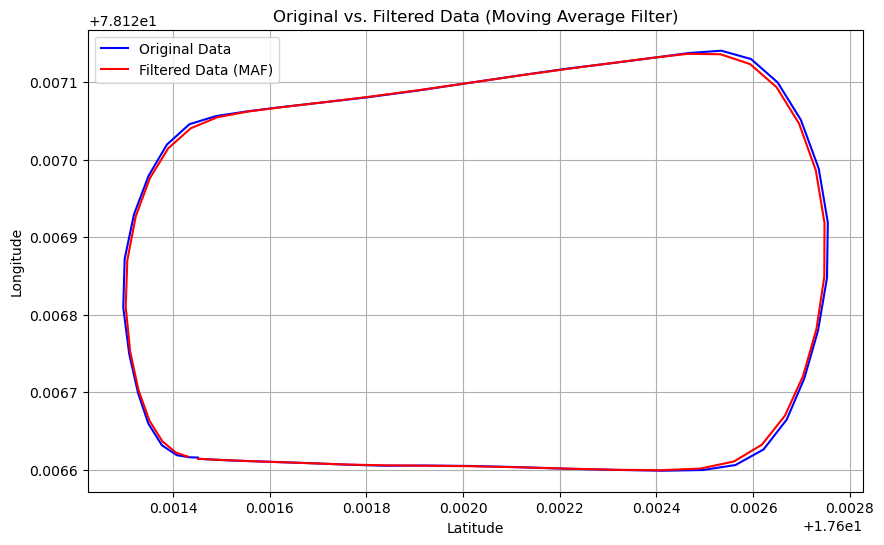

In [53]:
# Define the window size for the moving average filter
window_size = 3

# Apply the Moving Average Filter to the latitude and longitude data
filtered_latitudes_maf= np.convolve(latitudes, np.ones(window_size)/window_size, mode='valid')
filtered_longitudes_maf= np.convolve(longitudes, np.ones(window_size)/window_size, mode='valid')


# Plot the original and filtered data
plt.figure(figsize=(10, 6))
plt.plot(latitudes, longitudes,  label='Original Data', color='blue')
plt.plot(filtered_latitudes_maf, filtered_longitudes_maf,  label='Filtered Data (MAF)', color='red')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Original vs. Filtered Data (Moving Average Filter)')
plt.legend()
plt.grid(True)
plt.show()


## Graphs Plotting

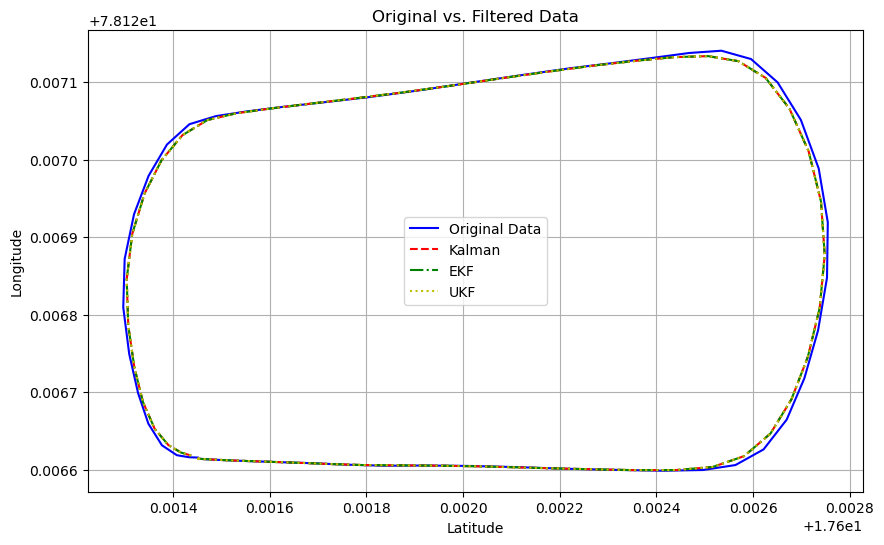

In [54]:
import matplotlib.pyplot as plt
 
# Plot all the filtered data in a single plot with legends
plt.figure(figsize=(10, 6))
plt.plot(latitudes,longitudes,  'b', label='Original Data')
plt.plot( filtered_latitudes_kf,filtered_longitudes_kf,'r--',label='Kalman')
plt.plot(filtered_latitudes_ekf,filtered_longitudes_ekf,'g-.',label='EKF')
plt.plot( filtered_latitudes_ukf,filtered_longitudes_ukf,'y:',label='UKF')
#plt.plot( filtered_latitudes_maf,filtered_longitudes_maf,'m-',label='MAF')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Original vs. Filtered Data')
plt.legend()
plt.grid(True)
plt.show()

## Errors PLotting

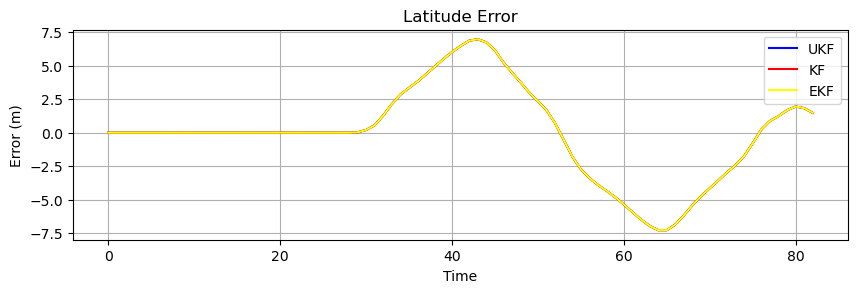

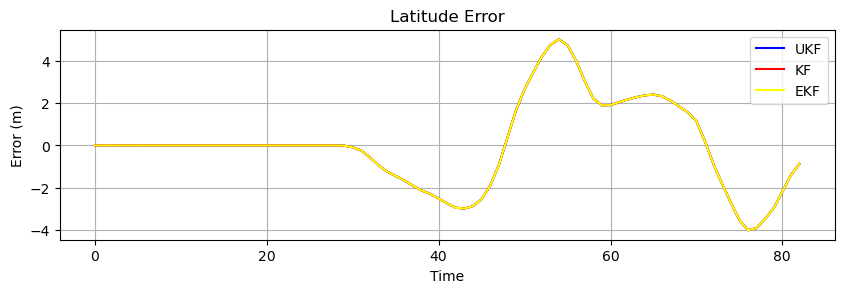

In [55]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(lat_error_ukf, label='UKF', color='blue')
plt.plot(lat_error_kf, label='KF', color='red')
plt.plot(lat_error_ekf, label='EKF', color='yellow')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('Latitude Error')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(lon_error_ukf, label='UKF', color='blue')
plt.plot(lon_error_kf, label='KF', color='red')
plt.plot(lon_error_ekf, label='EKF', color='yellow')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('Latitude Error')
plt.legend()
plt.grid(True)
plt.show()




In [56]:
import numpy as np

# Function to calculate RMSE
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions - targets) ** 2))

# Calculate RMSE for Kalman Filter
rmse_kf = rmse(np.array(filtered_latitudes_kf), np.array(latitudes)) + rmse(np.array(filtered_longitudes_kf), np.array(longitudes))
print("RMSE for Kalman Filter:", rmse_kf)

# Calculate RMSE for Extended Kalman Filter
rmse_ekf = rmse(np.array(filtered_latitudes_ekf), np.array(latitudes)) + rmse(np.array(filtered_longitudes_ekf), np.array(longitudes))
print("RMSE for Extended Kalman Filter:", rmse_ekf)

# Calculate RMSE for Unscented Kalman Filter
rmse_ukf = rmse(np.array(filtered_latitudes_ukf), np.array(latitudes)) + rmse(np.array(filtered_longitudes_ukf), np.array(longitudes))
print("RMSE for Unscented Kalman Filter:", rmse_ukf)


RMSE for Kalman Filter: 4.597455006359234e-05
RMSE for Extended Kalman Filter: 4.59745500635609e-05
RMSE for Unscented Kalman Filter: 4.597455007128398e-05
